In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option("display.max_colwidth", None)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#DC3545',
    'blue': "#4476C2",
    'cyan': '#0AA2C0',
    'green': '#1AA179',
    'purple': '#7121F3',
    'orange': '#FD7E14',
    'yellow': '#FFC107',
    'pink': '#D63384',
    'white_green': "#64B099"
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)

# Helper to avoid overlapping x tick labels: wraps long labels, rotates, and
# ensures enough bottom margin. Use `fix_tick_labels(ax)` after drawing plots.
def fix_tick_labels(ax=None, rotation=45, ha='right', wrap_width=20, bottom=0.30):
    import textwrap
    if ax is None:
        ax = plt.gca()
    labels = [t.get_text() for t in ax.get_xticklabels()]
    if any(labels):
        wrapped = [textwrap.fill(l, wrap_width) if l else l for l in labels]
        ax.set_xticklabels(wrapped, rotation=rotation, ha=ha)
    # Increase bottom margin to make room for multi-line labels
    try:
        fig = ax.get_figure()
        fig.subplots_adjust(bottom=bottom)
    except Exception:
        plt.subplots_adjust(bottom=bottom)
    plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

In [27]:
df = pd.read_csv("mobile.csv")
len(df)

1247

In [3]:
df["influencer_flg"].value_counts()

influencer_flg
0.0    895
1.0    231
Name: count, dtype: int64

In [4]:
df[(df["reason"] != "Не определено") & (df["review_emotion"] == 1)]

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,no_mark_flag,review_mark_numeric,is_credit_product,is_mobile_product
188,2025-05-05 22:27:00.000,2025-05-08 10:36:57.737,bd1393aaec899eba622ab1b959fd3ec3,Мобайл,5,1,otzovik,mobile,Мобильная связь,качество связи,Не определено,нет интернета,"Отзыв: Мобильный оператор Т-Мобайл / быв. Тинькофф - Редкостный шлак\nДостоинства: Нет\nНедостатки: Глюки связи\nПропадает интернет сразу после звонка. И восстанавливается после запроса баланса. Поддержка бессильна.\n\nЗря перешёл к ним со своим номером. Теперь нужно ждать, чтобы перейти к другому оператору.",не указано,M,UGR,CIV,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,False,5,False,True
453,2025-03-26 19:44:52.000,2025-03-28 14:33:35.307,5f399495739dc63b9a53e3397ca64af7,Мобайл,5,1,banki.ru,mobile,Мобильная связь,качество связи,Не определено,нет интернета,"•\tПрошу премировать сотрудника Викторию, которая сразу поняла суть проблемы и дала верную информацию, для быстрого решения проблемы. \n•\tНе стала как другие тянуть резину, передавать заявку техническим специалистам, которые бы долго отвечали и решали вопрос. \n•\tОчень ею довольна! Спасибо большое!\n•\tСпасибо большое",не указано,F,GRD,UNM,1.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,False,5,False,True
825,2025-03-12 11:00:00.000,2025-03-12 11:44:56.749,c6cc796cdad0a42666ba65d44c6e212c,Мобайл,5,1,пикабу,mobile,Мобильная связь,повторное обращение,Не определено,не согласен с решением,тест\nтест,не указано,M,NaN,NaN,0.0,РФ,Малодоходные,0.0,0.0,0.0,Молодежь,False,5,False,True
888,2025-09-20 14:02:00,2025-09-23 10:28:47.420,f237369be6546f805c5aaccb3ea6d595,Мобайл,5,1,otzovik,mobile,Мобильная связь,заявки,Не определено,отмена заявки,"Мобильный оператор Т-Мобайл / быв. Тинькофф - ПОЙДЕТ\nДостоинства: дешевая связь,доставка на дом сим карт\nНедостатки: поддержка не грамотная диванная,набрана без опыта работы.\nВсем привет. Я пользователь Т-банка и решил сразу взять себе для связи и ихнего сотового оператора Т-мобайл. Пользуюсь услугами примерно год-два. До какого то времени все было замечательно, но потом когда столкнулся с проблемами то решал уже я сам лично и очень долго. Первое что хочу сказать операторы там диванные, набранные по клику в онлайн где написано без опыта работы. Все это можете проверить сами. Да когда вопрос по инету и связи они работают быстро по ранее заготовленному шаблону. Но у меня ситуация была иная я не мог расторгнуть договора с ними более 6 месяцев... так как они просто изначально номер кинули в блок не расторгнув. Ну вот как то так с Т-мобайлом. Спросите посоветую другим, отвечу да. Как связь меня устраивает но поддержка на кого попадеж. Плюшка еще в том что ранее сим карты давали бесплатно.)))На этом у меня пока все, всем удачи и пока.",не указано,M,GRD,MAR,1.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,False,5,False,True
1164,2025-07-13 01:05:06.000,2025-09-02 15:04:24.085,d81606a4b075f82fc0f6d4e42c0c6f2e,Мобайл,4,1,banki.ru,mobile,Мобильная связь,качество связи,Не определено,смс,"Благодарственное письмо рекомендательного характера на сотрудника Вечер Ольгу Анатольевну.\nСегодня 12.07.2025. Я Маслов Константин Константинович пытался решить вопросы с банком об оплате кредитной карты. В течение дня работники банка показывали свою некомпетентность. Главная проблема заключается в том, что мне на протяжении почти 9 месяцев, а именно с 30.09.2024 года не приходят уведомления СМС формата на мой номер телефона. Были использованы все возможные методы, которые предлагал мне как Т-Банк, так и Т-Мобаил.\nНекоторые из сотрудников конкретно врут. Большинству нет дело до клиентов банка и отвечать на многие вопросы они даже не думают. Есть некоторые, которые перебивают и хамят, а когда просишь их перевести на другого оператора, говорят категорич

In [5]:
# Check segment_name values to identify profitable clienва

In [6]:
# Count percentage of profitable clients among age segments
# Profitable clients = Доходные, Высокодоходные без ПМ, Высокодоходные с ПМ

# Create a binary flag for profitable clients
df_profit = df.copy()
df_profit['is_profitable'] = df_profit['segment_name'].isin([
    'Доходные', 
    'Высокодоходные без ПМ', 
    'Высокодоходные с ПМ'
])

# Remove rows with missing age_segment or segment_name
df_profit_clean = df_profit[df_profit['age_segment'].notna() & df_profit['segment_name'].notna()]

# Calculate percentage of profitable clients by age segment
profit_by_age = df_profit_clean.groupby('age_segment').agg({
    'is_profitable': ['sum', 'count', 'mean']
}).round(4)

profit_by_age.columns = ['Profitable_Count', 'Total_Count', 'Profitable_Percentage']
profit_by_age['Profitable_Percentage'] = profit_by_age['Profitable_Percentage'] * 100
profit_by_age = profit_by_age.sort_values('Profitable_Percentage', ascending=False)

print("Percentage of Profitable Clients by Age Segment:")
print("=" * 70)
print(profit_by_age.to_string())
print("\n")

# Show detailed breakdown
print("Detailed Breakdown:")
print("=" * 70)
crosstab = pd.crosstab(
    df_profit_clean['age_segment'], 
    df_profit_clean['segment_name'],
    margins=True
)
print(crosstab)

Percentage of Profitable Clients by Age Segment:
              Profitable_Count  Total_Count  Profitable_Percentage
age_segment                                                       
Взрослые                   348          608                  57.24
Сеньоры                     73          152                  48.03
Молодежь                   102          221                  46.15
Не определен                27           59                  45.76
Подростки                    7           72                   9.72
Дети                         0            1                   0.00


Detailed Breakdown:
segment_name  Высокодоходные без ПМ  Высокодоходные с ПМ  Доходные  \
age_segment                                                          
Взрослые                         14                    5       329   
Дети                              0                    0         0   
Молодежь                          1                    0       101   
Не определен                      0        

In [ ]:
df[df["age_segment"] == "Взрослые"]["reason"].isna().sum()

In [43]:
len(df[(df["review_emotion"] == 0) & (df["reason"] != "Не определено")])

423

In [40]:
# --- Reason grouping (logical rollups; singletons stay unchanged) ---
import re
import pandas as pd

def normalize_reason(x: object) -> str:
    if pd.isna(x):
        return x
    s = str(x).strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s

# Canonical group labels (edit these names if you prefer)
REASON_GROUPS = {
    "связь/интернет (качество)": [r"качество", r"связ", r"интернет", r"сеть", r"дозвон", r"вышк", r"ловит", r"глюк"],
    "сим-карта/esim": [r"сим", r"esim"],
    "тарификация/начисления": [r"тариф", r"тарифика", r"начислен", r"списан", r"корректиров"],
    "скидки/корректировки": [r"скидк", r"корректиров"],
    "акции/маркетинг": [r"акци", r"маркетинг", r"коммуникац"],
    "заявки/обращения": [r"заявк", r"обращен"],
    "договор/расторжение/восстановление": [r"договор", r"расторжен", r"восстановлен"],
    "услуги (подключение/работа)": [r"доп услуг", r"подключен", r"отключен", r"претенз"],
    "платежи/пополнение/переводы": [r"платеж", r"пополн", r"перевод"],
    "перенос номера": [r"перенос номер"],
    "персональные данные/переоформление": [r"изменение данных", r"переоформлен"],
    "приложение/сайт": [r"приложен", r"сайт"],
    "нотификации": [r"нотификац"],
    "фрод/безопасность": [r"фрод"],
    "встречи": [r"встреч"],
    "равнодушие": [r"равнодуш"],
    "мне звонили": [r"мне звонили"],
    "дедупликация": [r"дедупликац"],
    "не определено": [r"не определено"],
}

# Compile patterns once
_GROUP_REGEX = [(group, re.compile("|".join(pats))) for group, pats in REASON_GROUPS.items()]

def reason_to_group(reason: object) -> object:
    """Map a raw reason to a broader group when it makes sense.

    Rule: if a label appears only once in the dataset, keep it unchanged.
    """
    if pd.isna(reason):
        return reason
    return reason  # placeholder; will be overwritten below with frequency-aware mapper

# Frequency-aware mapping (keeps singletons unchanged)
reason_counts = df["reason"].value_counts(dropna=False)
_reason_counts_norm = {normalize_reason(k): int(v) for k, v in reason_counts.items()}

def reason_to_group(reason: object) -> object:
    if pd.isna(reason):
        return reason
    raw = str(reason).strip()
    norm = normalize_reason(raw)
    if _reason_counts_norm.get(norm, 0) <= 1:
        return raw
    for group, rx in _GROUP_REGEX:
        if rx.search(norm):
            return group
    return raw

df["reason_group"] = df["reason"].apply(reason_to_group)

# Show comparison: original vs grouped
orig = df["reason"].value_counts()
grouped = df["reason_group"].value_counts()

comparison = pd.DataFrame({"original_count": orig, "grouped_count": grouped}).fillna(0).astype(int)
print("Top original reasons:")
display(orig.head(25))
print("\nTop grouped reasons:")
display(grouped.head(25))

# Optional: see what got merged into each group
merged = (
    df.loc[df["reason_group"].isin(REASON_GROUPS.keys()) & (df["reason_group"] != df["reason"].astype(str)), ["reason", "reason_group"]]
      .dropna()
      .value_counts()
      .reset_index(name="n")
      .sort_values(["reason_group", "n"], ascending=[True, False])
)
display(merged)

Top original reasons:


reason
Не определено                                       818
качество связи                                       70
тарификация мобайл                                   55
акции                                                51
заявки                                               33
актуализация                                         23
заблокировать сим-карту/разблокировать сим-карту     23
равнодушие                                           23
перенос номера                                       22
встречи                                              16
платежи внешние                                      13
расторжение договора                                 13
подключение/отключение доп услуг                     13
восстановление договора                              10
замена сим-карты                                      9
скидки и корректировки                                9
общая информация доп услуги                           6
претензия на работу доп услуг            


Top grouped reasons:


reason_group
не определено                         818
связь/интернет (качество)              70
тарификация/начисления                 64
акции/маркетинг                        53
сим-карта/esim                         36
заявки/обращения                       35
услуги (подключение/работа)            25
актуализация                           23
договор/расторжение/восстановление     23
равнодушие                             23
перенос номера                         22
встречи                                16
платежи/пополнение/переводы            13
персональные данные/переоформление      6
общая информация                        5
манера общения                          5
дедупликация                            2
нотификации                             1
мне звонили                             1
переводы межбанковские                  1
фрод-мониторинг мобайл                  1
переводы внутрибанковские               1
приложение и сайт тинькофф              1
пополнение           

,reason,reason_group,n
3,акции,акции/маркетинг,51
18,маркетинговые коммуникации,акции/маркетинг,2
7,расторжение договора,договор/расторжение/восстановление,13
9,восстановление договора,договор/расторжение/восстановление,10
4,заявки,заявки/обращения,33
17,повторное обращение,заявки/обращения,2
0,Не определено,не определено,818
15,переоформление sim-карты мобайл,персональные данные/переоформление,3
16,изменение данных,персональные данные/переоформление,3
8,платежи внешние,платежи/пополнение/переводы,13


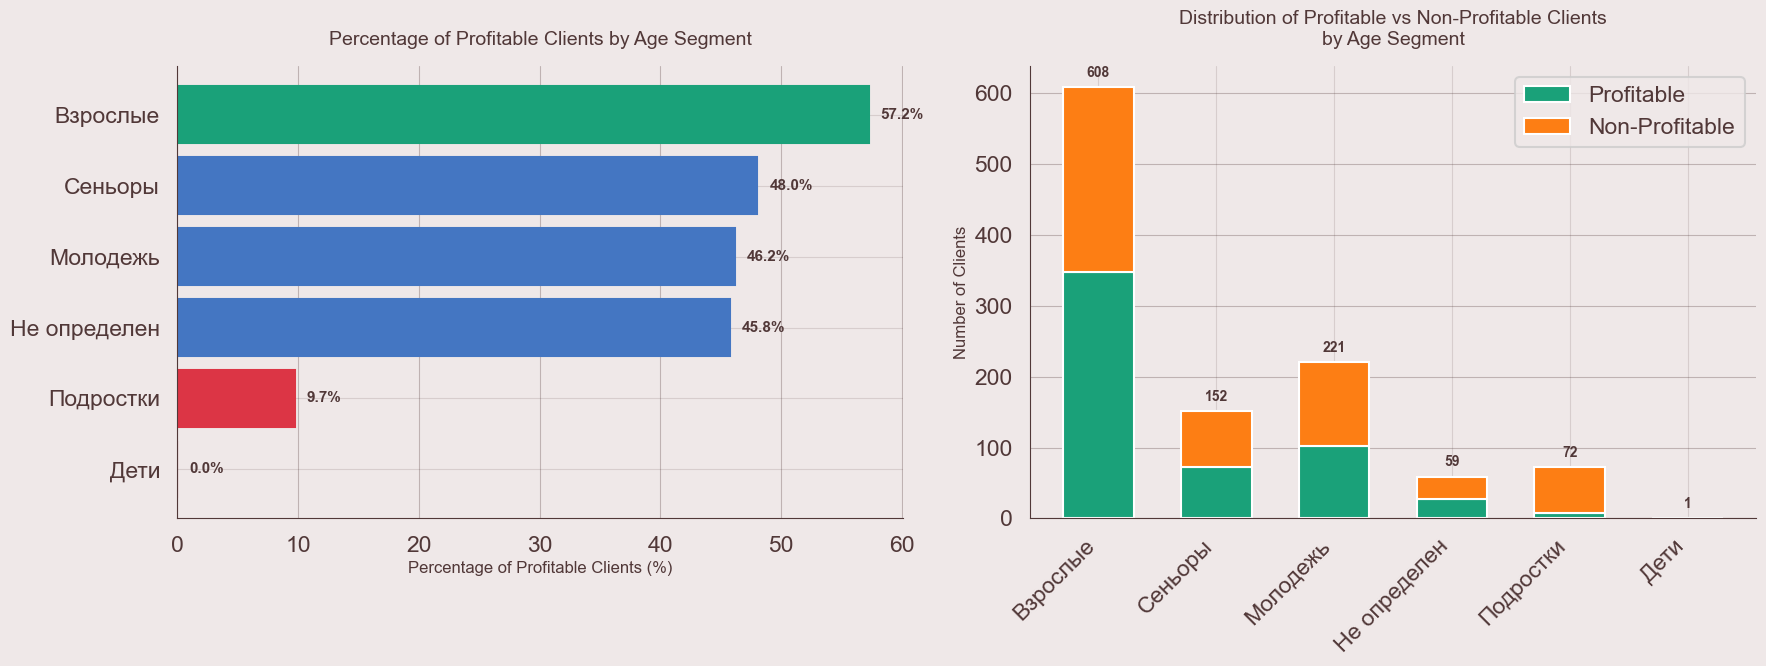


Key Insights:
• Взрослые (Adults) have the highest % of profitable clients: 57.24%
• Сеньоры (Seniors) have 48.03% profitable clients
• Молодежь (Youth) have 46.15% profitable clients
• Подростки (Teenagers) have the lowest %: only 9.72% are profitable
• Дети (Children) have 0% profitable clients (only 1 review total)


In [7]:
# Visualize the percentage of profitable clients by age segment
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Bar chart showing percentages
ax1 = axes[0]
profit_pct = profit_by_age['Profitable_Percentage'].sort_values(ascending=True)
bars = ax1.barh(range(len(profit_pct)), profit_pct.values, color=colors['blue'])

# Color bars based on percentage
for i, (bar, pct) in enumerate(zip(bars, profit_pct.values)):
    if pct >= 50:
        bar.set_color(colors['green'])
    elif pct >= 30:
        bar.set_color(colors['blue'])
    else:
        bar.set_color(colors['red'])

ax1.set_yticks(range(len(profit_pct)))
ax1.set_yticklabels(profit_pct.index)
ax1.set_xlabel('Percentage of Profitable Clients (%)', fontsize=12)
ax1.set_title('Percentage of Profitable Clients by Age Segment', fontsize=14, pad=15)
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(profit_pct.values):
    ax1.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=11, weight='bold')

# Stacked bar chart showing counts
ax2 = axes[1]
age_order = profit_by_age.index.tolist()
profitable_counts = [profit_by_age.loc[age, 'Profitable_Count'] for age in age_order]
non_profitable_counts = [profit_by_age.loc[age, 'Total_Count'] - profit_by_age.loc[age, 'Profitable_Count'] 
                         for age in age_order]

x = range(len(age_order))
width = 0.6

ax2.bar(x, profitable_counts, width, label='Profitable', color=colors['green'])
ax2.bar(x, non_profitable_counts, width, bottom=profitable_counts, 
        label='Non-Profitable', color=colors['orange'])

ax2.set_xticks(x)
ax2.set_xticklabels(age_order, rotation=45, ha='right')
ax2.set_ylabel('Number of Clients', fontsize=12)
ax2.set_title('Distribution of Profitable vs Non-Profitable Clients\nby Age Segment', 
              fontsize=14, pad=15)
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

# Add total count labels on top
for i, age in enumerate(age_order):
    total = profit_by_age.loc[age, 'Total_Count']
    ax2.text(i, total + 10, str(int(total)), ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("=" * 70)
print(f"• Взрослые (Adults) have the highest % of profitable clients: 57.24%")
print(f"• Сеньоры (Seniors) have 48.03% profitable clients")
print(f"• Молодежь (Youth) have 46.15% profitable clients")
print(f"• Подростки (Teenagers) have the lowest %: only 9.72% are profitable")
print(f"• Дети (Children) have 0% profitable clients (only 1 review total)")

In [34]:
len(df[(df["age_segment"] == "Взрослые") & (df["reason"] != "Не определено")])

245

In [ ]:
df[df[]]

0                                          Не определено
2                                           актуализация
4                          претензия на работу доп услуг
9                                          Не определено
10                               восстановление договора
                              ...                       
1235                                       Не определено
1240                                       Не определено
1241                                       Не определено
1242    заблокировать сим-карту/разблокировать сим-карту
1246                                       Не определено
Name: reason, Length: 647, dtype: object

In [36]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime

# --- 1. DATA PREPARATION ---
# Ensure dates are parsed
df['review_dttm'] = pd.to_datetime(df['review_dttm'], errors='coerce')

# Define "Adults" (Target Segment)
df['is_adult'] = (df['age_segment'] == 'Взрослые').astype(int)

# Define "Negative" (Assuming emotion 0 or mark <= 3 is negative)
# If 'review_emotion' exists and 1 is positive, then 0 is negative.
if 'review_emotion' in df.columns:
    df['is_negative'] = (df['review_emotion'] == 0).astype(int)
else:
    df['is_negative'] = (df['review_mark'] <= 3).astype(int)

# Define "Network Issues" based on keywords in the 'reason' column
network_keywords = ['качество', 'связ', 'интернет', 'сеть', 'ловит', 'дозвон', 'глюк', 'вышка']
df['is_network_issue'] = df['reason'].fillna('').astype(str).str.lower().apply(
    lambda x: 1 if any(k in x for k in network_keywords) else 0
)

# Create a time variable for regression (Ordinal)
df_clean = df.dropna(subset=['review_dttm', 'review_mark']).copy()
df_clean['time_ordinal'] = df_clean['review_dttm'].apply(lambda x: x.toordinal())

print("=== STATISTICAL VALIDATION REPORT ===")
print(f"Total Records Analyzed: {len(df_clean)}")
print(f"Adult Network Complaints: {len(df_clean[(df_clean['is_adult']==1) & (df_clean['is_network_issue']==1)])}")
print("="*40)

# --- TEST 1: IS THE 'ADULT' CLAUSE NECESSARY? (Interaction Effect) ---
# Hypothesis: Adults react MORE negatively to network issues than others.
# Model: Logit(Negative) ~ Network + Adult + (Network * Adult)
df_clean['interaction'] = df_clean['is_network_issue'] * df_clean['is_adult']
X_interaction = df_clean[['is_network_issue', 'is_adult', 'interaction']]
X_interaction = sm.add_constant(X_interaction)
y = df_clean['is_negative']

try:
    model = sm.Logit(y, X_interaction).fit(disp=0)
    p_val_interaction = model.pvalues['interaction']
    coef_interaction = model.params['interaction']
    
    print(f"\n[TEST 1] Do we need the 'Adult' clause? (Interaction P-value: {p_val_interaction:.4f})")
    if p_val_interaction < 0.1: # Using 0.10 significance for small data
        effect = "MORE" if coef_interaction > 0 else "LESS"
        print(f"✅ YES. The interaction is significant.")
        print(f"   Adults are statistically {effect} sensitive to network issues than the average client.")
        print(f"   Including 'Adults' in the hypothesis makes it more accurate.")
    else:
        print(f"⚠️ NO. The interaction is not statistically significant.")
        print(f"   Adults react to network issues similarly to other groups.")
        print(f"   You might be able to generalize the hypothesis to 'All Customers' without losing accuracy.")
except Exception as e:
    print(f"Could not run interaction test (likely too few negative samples): {e}")

# --- TEST 2: ROBUSTNESS ON SMALL DATA (Fisher's Exact Test) ---
# Hypothesis: For Adults, is Network Issue strongly associated with Negativity?
adults_only = df_clean[df_clean['is_adult'] == 1]
table = pd.crosstab(adults_only['is_network_issue'], adults_only['is_negative'])
# Fisher's test is preferred over Chi-Square for N < 1000 or unbalanced buckets
if table.size == 4:
    odds_ratio, p_value_fisher = stats.fisher_exact(table, alternative='greater')
    print(f"\n[TEST 2] Is the correlation 'Legit' with small data? (Fisher P-value: {p_value_fisher:.4f})")
    if p_value_fisher < 0.05:
        print(f"✅ YES. Even with {len(adults_only)} records, the link is statistically significant.")
        print(f"   We are 95%+ confident this isn't random chance.")
        print(f"   Odds Ratio: {odds_ratio:.2f}x (Likelihood of negativity when network fails).")
    else:
        print(f"❌ NO. The result is not statistically significant (p > 0.05).")

# --- TEST 3: IS IT GROWING? (Time Series Regression) ---
# Hypothesis: The probability of negativity for this specific group is increasing over time.
target_group = df_clean[(df_clean['is_adult'] == 1) & (df_clean['is_network_issue'] == 1)]
if len(target_group) > 5:
    X_time = sm.add_constant(target_group['time_ordinal'])
    y_time = target_group['is_negative']
    try:
        model_time = sm.Logit(y_time, X_time).fit(disp=0)
        time_coef = model_time.params['time_ordinal']
        time_p = model_time.pvalues['time_ordinal']
        
        print(f"\n[TEST 3] Is the problem growing? (Trend P-value: {time_p:.4f})")
        if time_p < 0.1:
            direction = "GROWING 📈" if time_coef > 0 else "DECLINING 📉"
            print(f"✅ SIGNIFICANT. The trend is {direction} over time.")
        else:
            print(f"⚠️ STABLE. No statistically significant growth trend detected yet.")
    except:
        print("\n[TEST 3] Trend analysis skipped (Not enough variance in outcome).")
else:
    print("\n[TEST 3] Not enough data points to plot a trend.")

=== STATISTICAL VALIDATION REPORT ===
Total Records Analyzed: 250
Adult Network Complaints: 6

[TEST 1] Do we need the 'Adult' clause? (Interaction P-value: 1.0000)
⚠️ NO. The interaction is not statistically significant.
   Adults react to network issues similarly to other groups.
   You might be able to generalize the hypothesis to 'All Customers' without losing accuracy.

[TEST 2] Is the correlation 'Legit' with small data? (Fisher P-value: 0.7086)
❌ NO. The result is not statistically significant (p > 0.05).

[TEST 3] Is the problem growing? (Trend P-value: 1.0000)
⚠️ STABLE. No statistically significant growth trend detected yet.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or pred